# Different Text Similarities Method on Linkedin Data

## Pre-requisite 

### Import Libraries

In [ ]:
!pip install pandas
!pip install nltk
!pip install beautifulsoup4
!pip install -U scikit-learn
!pip install heatmapz

In [5]:
import numpy as np
import pandas as pd
import nltk
from bs4 import BeautifulSoup
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Justi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Justi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# df["Training"][0]
# letters_only_text = re.sub("[^a-zA-Z]", " ", df["Training"][0])
# letters_only_text
# words = letters_only_text.lower().split()
# words = ['software', 'engineering', 'intern', 'in', 'd', 'ford', 'palo', 'alto', 'ca', 'forbes', 'under', 'scholar', 'machine', 'learning', 'researcher', 'palo', 'alto', 'california', 'united', 'states', 'hello', 'world', 'i', 'am']
# stopword_set = set(stopwords.words("english"))
# cleaned_words = list(set([w for w in words if w not in stopword_set]))
# cleaned_words
# cleaned_words2 = word_lemmatizer(cleaned_words)
# cleaned_words2

In [ ]:
Software Engineering Intern in D-Ford Palo Alto, CA | Forbes 30 Under 30 Scholar | Machine Learning Researcher Palo Alto, California, United States hello, world!\nI am


Software Engineering Intern in D Ford Palo Alto  CA   Forbes    Under    Scholar   Machine Learning Researcher Palo Alto  California  United States hello  world  I am

['software', 'engineering', 'intern', 'in', 'd', 'ford', 'palo', 'alto', 'ca', 'forbes', 'under', 'scholar', 'machine', 'learning', 'researcher', 'palo', 'alto', 'california', 'united', 'states', 'hello', 'world', 'i', 'am']

['engineering', 'learning', 'california', 'ford', 'alto', 'scholar', 'hello', 'world', 'forbes', 'states', 'software', 'palo', 'ca', 'united', 'intern', 'researcher', 'machine']

'engineering learning california ford alto scholar hello world forbes state software palo ca united intern researcher machine'

### Load & Preprocess Data

In [6]:
df = pd.read_csv('results_profiles_1594604186.csv')
df = df[df.Name != 'John D.']
df.dropna(axis=1,how='all')
df.shape
df

training = df.apply(lambda row: row["Headline"] + " " + row["Location"] + " " + row["Desc"] + " " + row["Skills"], axis = 1)
df['Training'] = training 

In [7]:
def preprocess(raw_text):

    # keep only words
    letters_only_text = re.sub("[^a-zA-Z]", " ", raw_text)

    # convert to lower case and split 
    words = letters_only_text.lower().split()

    # remove stopwords
    stopword_set = set(stopwords.words("english"))
    cleaned_words = list(set([w for w in words if w not in stopword_set]))

    return cleaned_words

### Only for bag of words Cosine Similarity

## Instantiate lemmatizer
lemmatizer = WordNetLemmatizer()

def word_lemmatizer(text):
    lem_text = " ".join([lemmatizer.lemmatize(i) for i in text])
    return lem_text

stemmer = PorterStemmer()

def word_stemmer(text):
    stem_text = " ".join([stemmer.stem(i) for i in text])
    return stem_text

## Method 1: Cosine Similarity Matrix

In [8]:
df_m1 = df.copy()
df_m1['Training'] = df_m1['Training'].apply(lambda x: preprocess(x))
df_m1['Training'] = df_m1['Training'].apply(lambda x: word_lemmatizer(x))
df_m1['Training']

0     junior python wish intern internship ca also a...
1     sport continuing push python hardware leadersh...
2     python computer student able gainesville inter...
3     hawaii swe python computer leadership state ho...
4     framework platform openmp python mac computer ...
5     uc python computer leadership student berkeley...
6     aspire leadership paul ecology therefore karao...
7     professional python anitab globe leadership da...
8     expose leadership cuny problem solving paul co...
9     everything aspire python state service intern ...
10    announce result everything aspire python leade...
11    setting formulation law ipo policy malaysia di...
13    healthkit currently core x scrum android uikit...
Name: Training, dtype: object

In [9]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial import distance

# Create the Document Term Matrix
count_vectorizer = CountVectorizer(stop_words='english')
count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(df_m1['Training'])

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df_cosine = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=df_m1['Name'])
df_cosine

,ability,able,academic,access,accolade,accounting,achieve,across,act,acting,...,work,working,world,writer,writing,xcode,xml,york,young,youth
Name,,,,,,,,,,,,,,,,,,,,,
Justin Lee,1,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
Zhi Yan (Ian) Leong [龙智彦] 😎,0,0,0,0,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
Noah Cook,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Daniel Ramsey,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
Jia Guo,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Mokshith Voodarla,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Xianyi “Sen” Xiong,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
Daniela Beck,0,0,1,1,1,1,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
Stavros Anastasiou,0,0,0,0,0,1,0,0,0,0,...,0,1,0,1,1,0,0,1,0,0


In [10]:
# df_test = pd.DataFrame([["Time is very slow for those who wait"],["Very fast for those who are scared"]], columns =['sent'])
# df_test

# sparse_matrix = count_vectorizer.fit_transform(df_test['sent'])

# # OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
# doc_term_matrix = sparse_matrix.todense()
# df_cosine = pd.DataFrame(doc_term_matrix, 
#                   columns=count_vectorizer.get_feature_names(), 
#                   index=df_test.index)
# df_cosine

In [11]:
#Comparing Noah with Victoria "As benchmark"
cosine = distance.cosine(sparse_matrix.toarray()[2].tolist(), sparse_matrix.toarray()[9].tolist())
print('Similarity of two sentences are equal to ',round((1-cosine)*100,2),'%')

Similarity of two sentences are equal to  40.09 %


In [12]:
## Changing Name for privacy Issues

df_cosine.index
df_cosine_placeholder = ['Justin', 'John', 'Albert',
       'Nick', 'Jason', 'Kevin', 'Steve',
       'Amy', 'Victoria', 'Sarah',
       'Nancy', 'Tyler', 'Andy']

[Text(0.5, 89.87999999999997, 'Name'), Text(51.0, 0.5, 'Name')]

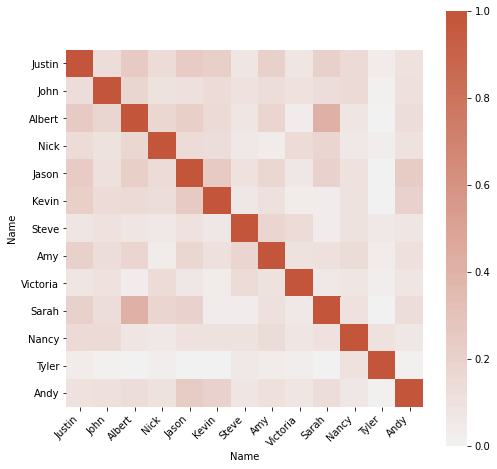

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
from heatmap import heatmap, corrplot
import numpy as np

#corr = np.subtract(cosine_similarity(df_cosine, df_cosine),1)
corr = cosine_similarity(df_cosine, df_cosine)
plt.figure(figsize=(8, 8))
ax = sns.heatmap(
    corr, 
    vmin= 0, vmax=1, center=0,
    cmap=sns.diverging_palette(220, 20, n=200),
    square=True
)

ax.set_xticklabels(
    df_cosine_placeholder,
    rotation=45,
    horizontalalignment='right'
);

ax.set_yticklabels(
    df_cosine_placeholder,
    rotation=0,
    horizontalalignment='right'
);

ax.set(xlabel="Name", ylabel = "Name")



In [14]:
corr

array([[1.        , 0.12941703, 0.25928149, 0.14113497, 0.24647955,
        0.22547802, 0.07524103, 0.20099944, 0.080016  , 0.20788768,
        0.15671662, 0.04989875, 0.11004875],
       [0.12941703, 1.        , 0.17616607, 0.09589266, 0.11696173,
        0.14855627, 0.11076372, 0.13110427, 0.10873206, 0.12555296,
        0.15431805, 0.02260212, 0.11393746],
       [0.25928149, 0.17616607, 1.        , 0.17010345, 0.22633937,
        0.15811388, 0.07254763, 0.1860521 , 0.03857584, 0.40089186,
        0.07883825, 0.        , 0.12126781],
       [0.14113497, 0.09589266, 0.17010345, 1.        , 0.14784425,
        0.12909944, 0.05923489, 0.05063697, 0.14698618, 0.18184824,
        0.05721881, 0.02618914, 0.09901475],
       [0.24647955, 0.11696173, 0.22633937, 0.14784425, 1.        ,
        0.25766925, 0.10509045, 0.16844366, 0.06984984, 0.19357357,
        0.10468597, 0.        , 0.24153958],
       [0.22547802, 0.14855627, 0.15811388, 0.12909944, 0.25766925,
        1.        , 0.06882

# Method 2: Consine Similarity with GloVe

In [15]:
df_m2 = df.copy()
df_m2['Training'] = df_m2['Training'].apply(lambda x: preprocess(x))

In [16]:
df_m2

,Name,Headline,Location,Connection,Desc,Email,Phone,Birthday,ConnectedDate,Skills,...,Year0,EducationName1,DegreeName1,Major1,Year1,EducationName2,DegreeName2,Major2,Year2,Training
0,Justin Lee,Software Engineering Intern in D-Ford Palo Alt...,"Palo Alto, California, United States",500+ connections,"hello, world!\nI am Justin Lee, a junior compu...",justinlee38@outlook.com,NaN,NaN,NaN,"Machine Learning,Python (Programming Language)...",...,Dates attended or expected graduation\n\n2018 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[junior, python, wish, intern, internship, ca,..."
1,Zhi Yan (Ian) Leong [龙智彦] 😎,Future Me Laughing at My Current Profile | Ele...,"Kalamazoo, Michigan Area",500+ connections,Live by the motto '💪Never say no until you try...,ianleong@live.com,269-2766449 (Home),May 22,"March 29, 2019","Leadership,Lifelong Learning,Critical Thinking...",...,Dates attended or expected graduation\n\n2020 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[sports, continuing, push, python, hardware, l..."
2,Noah Cook,Software Engineer Intern at Google,"Gainesville, Florida",500+ connections,"I'm Noah, a computer science student at the Un...",imnoahcook@gmail.com,3522143266 (Home),May 21,"June 5, 2020","C++,Java,Python (Programming Language),JavaScr...",...,Grade\nJunior,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[python, computer, student, able, gainesville,..."
3,Daniel Ramsey,Computer Engineering ‘20 | SWE intern @ Atlassian,"Honolulu, Hawaii, United States",500+ connections,Experienced Teaching Assistant and Computer En...,danielramsey10@hotmail.com,NaN,NaN,"June 22, 2019","Python,C++,Golang,Management,Leadership,Training",...,Dates attended or expected graduation\n\n2017 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[hawaii, swe, python, computer, leadership, st..."
4,Jia Guo,Software Engineer at Google,San Francisco Bay Area,199 connections,"Proficient in Python, Java, C/C++.\nFamiliar w...",jia.guo@wmich.edu,2692677464 (Mobile),NaN,"April 10, 2019","Java,C,Swift,iOS Development,Data Analysis,Alg...",...,Grade\n3.89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[framework, platform, openmp, python, mac, com..."
5,Mokshith Voodarla,Computer Vision & Robotics | UC Berkeley EECS,San Francisco Bay Area,500+ connections,I'm an EECS student at UC Berkeley with an int...,mvoodarla@gmail.com,NaN,NaN,"April 12, 2020","Machine Learning,Deep Learning,Android Develop...",...,Dates attended or expected graduation\n\n2019 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[uc, python, computer, leadership, student, be..."
6,Xianyi “Sen” Xiong,Lifelong Student/Academic of Systems Microbiol...,Greater Minneapolis-St. Paul Area,500+ connections,I aspire to create a synergy between human act...,xianyixiong01@gmail.com,NaN,NaN,"June 17, 2019","Leadership,Public Speaking,Research,Epidemiolo...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[aspire, leadership, paul, ecology, therefore,..."
7,Daniela Beck,PM + Analytics | Content Creator | Speaker,Greater Pittsburgh Region,500+ connections,Daniela is from Chatham University with a Bach...,beck.a.daniela@gmail.com,724-493-3374 (Mobile),NaN,"June 17, 2019","Leadership,Project Management,Python,Financial...",...,Grade\n3.96/4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[professional, python, anitab, globe, leadersh..."
8,Stavros Anastasiou,Writer at Greek Reporter l Queens College BA G...,New York City Metropolitan Area,131 connections,"Hello, my name is Stavros Anastasiou; I'm curr...",stavroanastasiou@gmail.com,NaN,NaN,"July 11, 2020","Project Management,Interpersonal Communication...",...,Grade\n3.81/4.00 GPA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[expose, leadership, cuny, problem, solving, p..."
9,Victoria Johnson,Software Engineer Intern at Google,"New York, New York, United States",22 connections,"I love everything about the Internet, I aspire...",NaN,NaN,NaN,"July 7, 2020","JavaScript,PHP,Python (Programming Language),A...",...,Grade\n4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[everything, aspire, python, states, services,..."


In [17]:
gloveFile = "data\glove.6B.50d.txt"

def loadGloveModel(gloveFile):
    print ("Loading Glove Model")
    with open(gloveFile, encoding="utf8" ) as f:
        content = f.readlines()
    model = {}
    for line in content:
        splitLine = line.split()
        word = splitLine[0]
        embedding = np.array([float(val) for val in splitLine[1:]])
        model[word] = embedding
    print ("Done.",len(model)," words loaded!")
    return model

def cosine_distance_between_two_words(word1, word2):
    import scipy
    return (1- scipy.spatial.distance.cosine(model[word1], model[word2]))

def calculate_heat_matrix_for_two_sentences(s1,s2):
    s1 = preprocess(s1)
    s2 = preprocess(s2)
    result_list = [[cosine_distance_between_two_words(word1, word2) for word2 in s2] for word1 in s1]
    result_df = pd.DataFrame(result_list)
    result_df.columns = s2
    result_df.index = s1
    return result_df

def cosine_distance_wordembedding_method(s1, s2):
    import scipy
#     for doc in df['Desc']:
#         words = filter(lambda x: x in model.vocab, doc)
    vector_1 = np.mean([model[word] for word in filter(lambda x: x in model, s1)],axis=0)
    vector_2 = np.mean([model[word] for word in filter(lambda x: x in model, s2)],axis=0)
    cosine = scipy.spatial.distance.cosine(vector_1, vector_2)
    similarity_value = round((1-cosine)*100,2)
#     print('Word Embedding method with a cosine distance asses that our two sentences are similar to',similarity_value,'%')
    return similarity_value

def heat_map_matrix_between_two_sentences(s1,s2):
    df = calculate_heat_matrix_for_two_sentences(s1,s2)
    import seaborn as sns
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(figsize=(5,5)) 
    ax_blue = sns.heatmap(df, cmap="YlGnBu")
    # ax_red = sns.heatmap(df)
    print(cosine_distance_wordembedding_method(s1, s2))
    return ax_blue

def calculate_heat_matrix_for_cosine_distance(a1,a2):
    desc1 = a1['Training'] 
    desc2 = a2['Training']
    result_list = [[cosine_distance_wordembedding_method(item1, item2) for item2 in desc2] for item1 in desc1]
    result_df = pd.DataFrame(result_list)
    result_df.columns = a2['Name']
    result_df.index = a1['Name']
    return result_df

def showing_in_heamap(result_df):
    plt.figure(figsize=(8, 8))
    ax = sns.heatmap(
        result_df.corr(), 
        vmin=0, vmax=1, center=0,
        cmap=sns.diverging_palette(220, 20, n=200),
        square=True
    )
    ax.set_xticklabels(
        # df_cosine.index,
        df_cosine_placeholder,
        rotation=45,
        horizontalalignment='right'
    );

    ax.set_yticklabels(
        #df_cosine.index,
        df_cosine_placeholder,
        rotation=0,
        horizontalalignment='right'
    );
    return ax

In [18]:
model = loadGloveModel(gloveFile)

Loading Glove Model
Done. 400000  words loaded!


In [19]:
df2 = calculate_heat_matrix_for_cosine_distance(df_m2,df_m2)
df2

Name,Justin Lee,Zhi Yan (Ian) Leong [龙智彦] 😎,Noah Cook,Daniel Ramsey,Jia Guo,Mokshith Voodarla,Xianyi “Sen” Xiong,Daniela Beck,Stavros Anastasiou,Victoria Johnson,M. Razlan Dhamir Hamdan,Dzuleira Abu Bakar,Andrew Nguyen 
Name,,,,,,,,,,,,,
Justin Lee,100.00,96.99,96.90,90.65,88.77,93.93,90.19,96.96,92.89,94.35,95.63,80.66,89.07
Zhi Yan (Ian) Leong [龙智彦] 😎,96.99,100.00,92.35,92.13,80.55,89.11,89.38,95.03,94.57,89.46,95.77,81.39,81.13
Noah Cook,96.90,92.35,100.00,88.87,89.99,94.17,84.39,94.70,91.04,95.75,90.53,77.34,89.99
Daniel Ramsey,90.65,92.13,88.87,100.00,72.74,88.35,86.36,90.42,93.52,81.44,88.02,79.58,75.92
Jia Guo,88.77,80.55,89.99,72.74,100.00,88.18,78.63,85.86,73.44,93.03,83.34,70.34,97.26
Mokshith Voodarla,93.93,89.11,94.17,88.35,88.18,100.00,84.82,90.24,88.14,89.39,87.29,75.34,88.36
Xianyi “Sen” Xiong,90.19,89.38,84.39,86.36,78.63,84.82,100.00,91.50,88.30,81.51,92.46,82.87,78.85
Daniela Beck,96.96,95.03,94.70,90.42,85.86,90.24,91.50,100.00,94.97,92.83,95.38,86.76,86.40
Stavros Anastasiou,92.89,94.57,91.04,93.52,73.44,88.14,88.30,94.97,100.00,84.91,90.72,80.73,75.29


c:\users\justi\documents\code\summer-research\research-venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 40857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\justi\documents\code\summer-research\research-venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26234 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\justi\documents\code\summer-research\research-venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24422 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\justi\documents\code\summer-research\research-venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 63743 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\justi\documents\code\summer-research\research-venv\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 40857 missing from c

<AxesSubplot:xlabel='Name', ylabel='Name'>

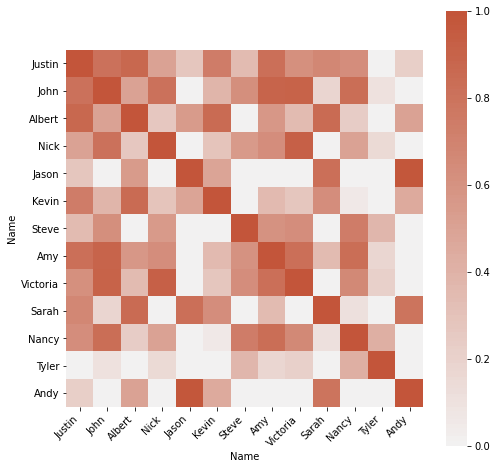

In [20]:
showing_in_heamap(df2)

In [21]:
print(df_m2['Training'][2])
print(df_m2['Training'][9])

['python', 'computer', 'student', 'able', 'gainesville', 'intern', 'customer', 'internet', 'graduate', 'service', 'web', 'applications', 'use', 'javascript', 'florida', 'looking', 'engineer', 'forward', 'university', 'science', 'noah', 'google', 'software', 'passion', 'java', 'office', 'put', 'language', 'programming', 'microsoft', 'c', 'good', 'building']
['everything', 'aspire', 'python', 'states', 'services', 'intern', 'internet', 'build', 'greater', 'web', 'javascript', 'coding', 'engineer', 'amazon', 'new', 'angularjs', 'united', 'google', 'aws', 'software', 'york', 'love', 'js', 'language', 'programming', 'proficient', 'jquery', 'php', 'good']


In [22]:
# print(model.wv.similarity("javascript", "jquery"))
# print(model.wv.similarity("interest", "passion"))
# model.wv.similar_by_word("javascript", topn=10)
# programming and coding
# application and software
# javascript and jquery

## Method 3: Word Embedding with FastText

In [ ]:
df_m3 = df.copy()
df_m3['Training'] = df_m3['Training'].apply(lambda x: preprocess(x))

In [70]:
# import io

# def load_vectors(fname):
#     fin = io.open(fname, 'r', encoding='utf-8', newline='\n', errors='ignore')
#     n, d = map(int, fin.readline().split())
#     data = {}
#     for line in fin:
#         tokens = line.rstrip().split(' ')
#         data[tokens[0]] = map(float, tokens[1:])
#     return data

In [62]:
from pprint import pprint as print
from gensim.models.fasttext import FastText
from gensim.test.utils import datapath

# Set file names for train and test data
corpus_file = datapath('lee_background.cor')

model = FastText(size=150)

# build the vocabulary
model.build_vocab(corpus_file=corpus_file)

# train the model
model.train(
    corpus_file=corpus_file, epochs=model.epochs,
    total_examples=model.corpus_count, total_words=model.corpus_total_words,
)

print(model)

In [66]:
from gensim.models import FastText
from gensim.test.utils import common_texts  # some example sentences

model = FastText()  # instantiate
model.build_vocab(sentences=common_texts)
model.train(sentences=common_texts, total_examples=len(common_texts), epochs=10)  # train

In [50]:
wv = model.wv

In [73]:
import gensim.downloader as api
model = api.load('fasttext-wiki-news-subwords-300')

In [74]:
df3 = calculate_heat_matrix_for_cosine_distance(df_m3, df_m3)
df3

Name,Justin Lee,Zhi Yan (Ian) Leong [龙智彦] 😎,Noah Cook,Daniel Ramsey,Jia Guo,Mokshith Voodarla,Xianyi “Sen” Xiong,Daniela Beck,Stavros Anastasiou,Victoria Johnson,M. Razlan Dhamir Hamdan,Dzuleira Abu Bakar,Andrew Nguyen 
Name,,,,,,,,,,,,,
Justin Lee,100.00,97.54,94.68,92.36,89.27,90.41,94.51,96.91,95.02,93.04,96.52,88.31,88.41
Zhi Yan (Ian) Leong [龙智彦] 😎,97.54,100.00,92.49,92.89,84.27,88.16,95.55,96.16,96.18,89.63,97.61,89.96,84.91
Noah Cook,94.68,92.49,100.00,90.97,89.32,87.87,87.92,93.01,90.78,93.31,90.77,84.21,87.53
Daniel Ramsey,92.36,92.89,90.97,100.00,82.11,85.56,90.20,91.74,93.17,86.06,91.31,85.29,85.34
Jia Guo,89.27,84.27,89.32,82.11,100.00,88.00,79.46,85.59,81.62,88.56,83.83,74.59,94.50
Mokshith Voodarla,90.41,88.16,87.87,85.56,88.00,100.00,85.23,87.57,86.16,85.92,85.67,78.92,86.84
Xianyi “Sen” Xiong,94.51,95.55,87.92,90.20,79.46,85.23,100.00,95.44,93.97,86.16,95.77,91.50,80.81
Daniela Beck,96.91,96.16,93.01,91.74,85.59,87.57,95.44,100.00,95.38,91.92,96.18,91.42,85.04
Stavros Anastasiou,95.02,96.18,90.78,93.17,81.62,86.16,93.97,95.38,100.00,88.28,95.05,89.22,83.08


c:\users\justi\documents\code\summer-research\research-venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 40857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\justi\documents\code\summer-research\research-venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26234 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\justi\documents\code\summer-research\research-venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24422 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\justi\documents\code\summer-research\research-venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 63743 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\justi\documents\code\summer-research\research-venv\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 40857 missing from c

<AxesSubplot:xlabel='Name', ylabel='Name'>

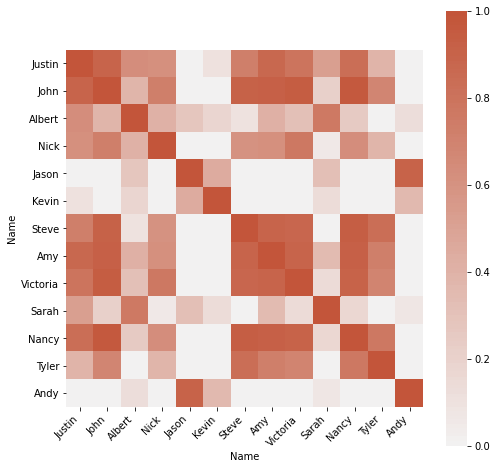

In [75]:
showing_in_heamap(df3)

In [28]:
model["apple"]

<ipython-input-28-d6f0f492e8b6>:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  model["apple"]


array([ 0.04397092,  0.00101449, -0.2831679 ,  0.23561189,  0.29664665,
       -0.15677431, -0.09217774, -0.01846338,  0.21101631,  0.16906711,
       -0.31102252, -0.0048423 , -0.33265918,  0.19939056,  0.13571991,
       -0.03535423, -0.0953323 ,  0.08963288,  0.11743473, -0.1815076 ,
       -0.1180534 ,  0.13326354, -0.18174727,  0.01103269, -0.4083233 ,
        0.3590784 ,  0.05484522,  0.08652912,  0.19976814,  0.00611171,
       -0.31930563,  0.11381368,  0.0390284 , -0.23407552,  0.22954576,
        0.05449998, -0.08001884, -0.03363618,  0.2070963 ,  0.1029148 ,
       -0.00480054, -0.03251574,  0.18870883, -0.02736625,  0.05844132,
        0.08893614, -0.06279296,  0.10529415, -0.00750226, -0.18902738,
       -0.28036186, -0.26987937,  0.03306464,  0.01099536,  0.19538903,
       -0.394844  , -0.05575424, -0.08542531,  0.00515031, -0.01368153,
        0.10505482, -0.06085924, -0.24035434, -0.05039119, -0.261887  ,
        0.16691712,  0.00372908,  0.07399452,  0.01488671,  0.23

### To Do:


#### Report: 
1. Introduction
2. (Data Preprocessing) 
    i. how I collected data from linkedin
    ii. cleaning data
3. Methodology
    i. cosine similarity + bag of words
    ii. gloVe word embedding + cosine similarity
    iii. Visualization (heat map) libgen 
4. Conclusion
    

In [30]:
vec_king = wv['king']

In [31]:
model = wv

In [32]:
df3 = calculate_heat_matrix_for_cosine_distance(df_m3,df_m3)
df3

Name,Justin Lee,Zhi Yan (Ian) Leong [龙智彦] 😎,Noah Cook,Daniel Ramsey,Jia Guo,Mokshith Voodarla,Xianyi “Sen” Xiong,Daniela Beck,Stavros Anastasiou,Victoria Johnson,M. Razlan Dhamir Hamdan,Dzuleira Abu Bakar,Andrew Nguyen 
Name,,,,,,,,,,,,,
Justin Lee,100.00,88.61,86.37,74.89,82.87,80.62,80.08,89.90,80.78,82.12,84.47,59.59,79.04
Zhi Yan (Ian) Leong [龙智彦] 😎,88.61,100.00,77.91,79.41,69.29,75.93,79.81,83.32,86.65,71.58,87.86,60.56,70.41
Noah Cook,86.37,77.91,100.00,72.09,83.17,76.93,65.65,84.89,72.52,87.88,71.32,51.09,77.08
Daniel Ramsey,74.89,79.41,72.09,100.00,57.86,66.68,71.00,73.52,78.00,65.50,71.96,54.36,59.38
Jia Guo,82.87,69.29,83.17,57.86,100.00,76.22,62.68,82.55,61.07,85.59,66.02,51.47,91.37
Mokshith Voodarla,80.62,75.93,76.93,66.68,76.22,100.00,64.86,72.77,66.23,69.57,68.26,44.30,74.12
Xianyi “Sen” Xiong,80.08,79.81,65.65,71.00,62.68,64.86,100.00,79.87,78.12,59.71,83.44,65.19,63.66
Daniela Beck,89.90,83.32,84.89,73.52,82.55,72.77,79.87,100.00,81.44,81.81,83.17,67.35,80.87
Stavros Anastasiou,80.78,86.65,72.52,78.00,61.07,66.23,78.12,81.44,100.00,66.94,79.57,59.61,61.54


c:\users\justi\documents\code\summer-research\research-venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 40857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\justi\documents\code\summer-research\research-venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 26234 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\justi\documents\code\summer-research\research-venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24422 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\justi\documents\code\summer-research\research-venv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 63743 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\justi\documents\code\summer-research\research-venv\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 40857 missing from c

<AxesSubplot:xlabel='Name', ylabel='Name'>

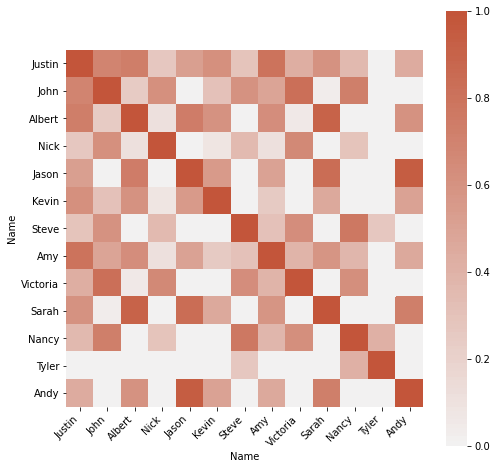

In [33]:
showing_in_heamap(df3)

In [34]:
from gensim.models.keyedvectors import KeyedVectors
word_vect = KeyedVectors.load_word2vec_format("SO_vectors_200.bin", binary=True)

In [35]:
words=['virus','java','mysql']
for w in words:
    try:
        print(word_vect.most_similar(w))
    except KeyError as e:
            print(e)   

[('malware', 0.8455425500869751),
 ('viruses', 0.8440008759498596),
 ('antivirus', 0.8379444479942322),
 ('anti-virus', 0.8235735893249512),
 ('spyware', 0.7659314870834351),
 ('mcafee', 0.754204511642456),
 ('malwarebytes', 0.7523447871208191),
 ('avast', 0.7465472221374512),
 ('avira', 0.7376064658164978),
 ('anti-malware', 0.7363340854644775)]
[('jave', 0.7305740118026733),
 ('j2se', 0.6334485411643982),
 ('javase', 0.6294389367103577),
 ('scala', 0.6201648116111755),
 ('non-java', 0.61116623878479),
 ('javas', 0.6073752045631409),
 ('-java', 0.5853540897369385),
 ('jav', 0.5707030296325684),
 ('jdk', 0.5517216920852661),
 ('java5', 0.5513849258422852)]
[('postgresql', 0.7997364401817322),
 ('postgres', 0.7909045219421387),
 ('mssql', 0.7834541201591492),
 ('mariadb', 0.7827132344245911),
 ('msql', 0.7762644290924072),
 ('postgressql', 0.7286335229873657),
 ('mysql/mariadb', 0.7264211177825928),
 ('postresql', 0.7253730297088623),
 ('postgre', 0.7069053053855896),
 ('pgsql', 0.70368

In [36]:
print(word_vect.doesnt_match("java c++ python bash".split()))

'bash'


c:\users\justi\documents\code\summer-research\research-venv\lib\site-packages\gensim\models\keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


In [37]:
model = word_vect

In [38]:
df3 = calculate_heat_matrix_for_cosine_distance(df_m3,df_m3)
df3

Name,Justin Lee,Zhi Yan (Ian) Leong [龙智彦] 😎,Noah Cook,Daniel Ramsey,Jia Guo,Mokshith Voodarla,Xianyi “Sen” Xiong,Daniela Beck,Stavros Anastasiou,Victoria Johnson,M. Razlan Dhamir Hamdan,Dzuleira Abu Bakar,Andrew Nguyen 
Name,,,,,,,,,,,,,
Justin Lee,100.00,90.74,87.86,86.28,81.13,86.09,85.87,85.24,87.21,75.94,89.64,73.79,75.66
Zhi Yan (Ian) Leong [龙智彦] 😎,90.74,100.00,84.54,84.38,75.58,81.72,85.71,84.29,86.71,69.27,94.37,77.49,76.20
Noah Cook,87.86,84.54,100.00,80.26,82.64,81.83,75.97,85.21,79.16,82.29,81.38,67.39,75.19
Daniel Ramsey,86.28,84.38,80.26,100.00,71.25,82.64,77.94,75.37,85.79,65.01,79.42,72.98,69.26
Jia Guo,81.13,75.58,82.64,71.25,100.00,81.34,63.59,73.48,62.17,74.60,76.65,54.98,83.06
Mokshith Voodarla,86.09,81.72,81.83,82.64,81.34,100.00,69.90,72.28,74.61,65.03,76.85,58.00,75.33
Xianyi “Sen” Xiong,85.87,85.71,75.97,77.94,63.59,69.90,100.00,85.13,86.82,56.55,86.14,80.06,65.04
Daniela Beck,85.24,84.29,85.21,75.37,73.48,72.28,85.13,100.00,83.27,74.81,84.17,76.71,75.05
Stavros Anastasiou,87.21,86.71,79.16,85.79,62.17,74.61,86.82,83.27,100.00,61.91,85.63,78.25,66.19
